In [82]:
import pandas as pd

In [83]:
pd.set_option('display.max_columns',None)

In [84]:
data=pd.read_csv('credit_approval.csv')
X=data.drop('Target',axis=1)

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Scaling - Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [86]:
X.shape

(690, 14)

In [105]:
data

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

In [89]:
Y=data['Target']

In [90]:
len(dat1.columns)-1

14

In [91]:
dat1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Target
0,0.688737,-0.801052,1.347111,0.542950,-0.916282,-0.347965,-0.190906,-1.047504,-0.864196,-0.493887,1.087908,0.237828,-0.488358,0.037380,0
1,-1.451933,-0.751240,0.450548,0.542950,0.170499,-0.347965,-0.615536,-1.047504,-0.864196,-0.493887,-0.919195,0.237828,-0.139591,-0.195413,0
2,-1.451933,-0.167856,-0.604823,-1.783978,-0.916282,-0.347965,-0.291083,-1.047504,-0.864196,-0.493887,1.087908,0.237828,0.557943,-0.195413,0
3,-1.451933,-0.835667,1.355152,-1.783978,-0.644587,-0.850257,-0.664877,0.954650,1.157144,1.769760,1.087908,0.237828,-1.069637,-0.195413,1
4,0.688737,-0.962306,0.685745,0.542950,-0.372892,-0.347965,-0.078768,0.954650,1.157144,2.387119,-0.919195,0.237828,-0.720870,-0.165066,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.688737,0.000152,1.154129,0.542950,1.800670,-0.347965,1.278852,0.954650,-0.864196,-0.493887,-0.919195,0.237828,-1.069637,-0.195413,1
686,0.688737,-0.920093,-0.873189,0.542950,0.170499,-0.347965,-0.627497,-1.047504,-0.864196,-0.493887,-0.919195,0.237828,-1.069637,-0.186962,0
687,-1.451933,-1.075437,0.961146,0.542950,-0.372892,-0.347965,-0.639459,0.954650,-0.864196,-0.493887,-0.919195,0.237828,-0.488358,-0.195413,1
688,-1.451933,-0.350217,1.958221,0.542950,1.800670,1.661205,0.257647,0.954650,1.157144,-0.288101,-0.919195,0.237828,-0.372103,-0.193301,1


In [93]:
pca=PCA(n_components=14)

In [94]:
x1=pca.fit_transform(X)

In [95]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

In [96]:
cum_exp_var

[0.19942393338173856,
 0.30593562801560487,
 0.40180403605242904,
 0.48094666218383464,
 0.5555170308664801,
 0.6264945449689506,
 0.6926367561201565,
 0.7515010249026949,
 0.8087497922277547,
 0.8566022870133123,
 0.8992879985917193,
 0.9374721333114336,
 0.9724981347940711,
 0.9999999999999998]

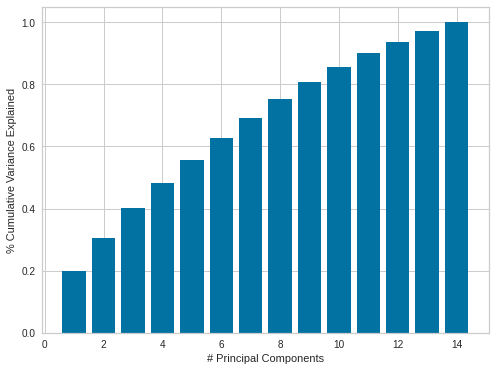

In [98]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,15), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [99]:
data.corr()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
C1,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
N2,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
N3,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
C4_enc,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
C5_enc,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
C6_enc,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
N7,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
C8,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
C9,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301
N10,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,0.101479,-0.119808,0.063692,0.406410


In [14]:
!pip install pycaret

In [100]:
from pycaret.classification import *

In [106]:
dat1=pd.DataFrame(x1)
dat1['Target']=data['Target']

In [107]:
model_setup = setup(data=dat1, target='Target', session_id=123)

,Description,Value
0,session_id,123
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(690, 15)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [108]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8652,0.9372,0.8508,0.8667,0.8541,0.7292,0.7362,0.195
ridge,Ridge Classifier,0.8631,0.0000,0.9368,0.8063,0.8643,0.7289,0.7414,0.016
lda,Linear Discriminant Analysis,0.8631,0.9406,0.9368,0.8063,0.8643,0.7289,0.7414,0.019
lr,Logistic Regression,0.8611,0.9419,0.8779,0.8386,0.8536,0.7221,0.7295,0.024
et,Extra Trees Classifier,0.8589,0.9367,0.8599,0.8422,0.8480,0.7167,0.7213,0.469
lightgbm,Light Gradient Boosting Machine,0.8548,0.9296,0.8551,0.8418,0.8445,0.7088,0.7145,0.079
xgboost,Extreme Gradient Boosting,0.8547,0.9262,0.8597,0.8383,0.8445,0.7087,0.7155,0.429
nb,Naive Bayes,0.8509,0.9182,0.8419,0.8459,0.8384,0.7006,0.7080,0.019
catboost,CatBoost Classifier,0.8506,0.9386,0.8599,0.8347,0.8417,0.7011,0.7097,4.589
rf,Random Forest Classifier,0.8486,0.9301,0.8464,0.8413,0.8383,0.6966,0.7050,0.521


In [109]:
m1=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8776,0.9565,0.7826,0.9474,0.8571,0.7517,0.7622
1,0.7959,0.8502,0.9545,0.7000,0.8077,0.6010,0.6342
2,0.8750,0.9467,0.7727,0.9444,0.8500,0.7447,0.7557
3,0.9375,0.9913,0.9091,0.9524,0.9302,0.8737,0.8745
4,0.8542,0.9476,0.9091,0.8000,0.8511,0.7093,0.7149
5,0.8750,0.9572,0.8182,0.9000,0.8571,0.7465,0.7492
6,0.7708,0.8986,0.8636,0.7037,0.7755,0.5464,0.5584
7,0.8958,0.9458,0.8636,0.9048,0.8837,0.7895,0.7902
8,0.8125,0.9117,0.8636,0.7600,0.8085,0.6263,0.6312
9,0.7917,0.8951,0.7273,0.8000,0.7619,0.5775,0.5795


In [59]:
m2=tune_model(m1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8776,0.9348,0.8261,0.9048,0.8636,0.7529,0.7555
1,0.7347,0.8401,0.7727,0.6800,0.7234,0.4705,0.4740
2,0.8542,0.9545,0.7273,0.9412,0.8205,0.7011,0.7176
3,0.9583,0.9878,0.9545,0.9545,0.9545,0.9161,0.9161
4,0.8750,0.9563,0.9091,0.8333,0.8696,0.7500,0.7526
5,0.9375,0.9790,0.9091,0.9524,0.9302,0.8737,0.8745
6,0.8750,0.9248,0.9091,0.8333,0.8696,0.7500,0.7526
7,0.8542,0.9336,0.7273,0.9412,0.8205,0.7011,0.7176
8,0.8125,0.9196,0.8182,0.7826,0.8000,0.6237,0.6242
9,0.8542,0.8829,0.7727,0.8947,0.8293,0.7032,0.7089


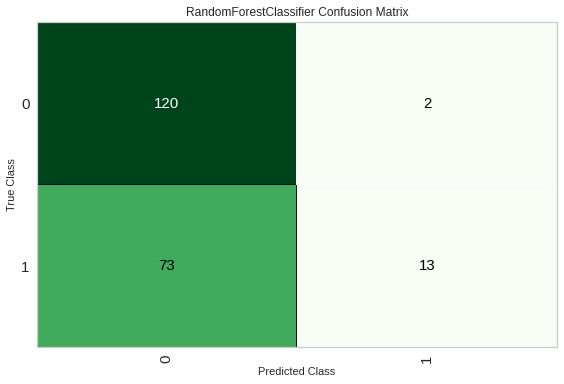

In [60]:
plot_model(m2,'confusion_matrix')

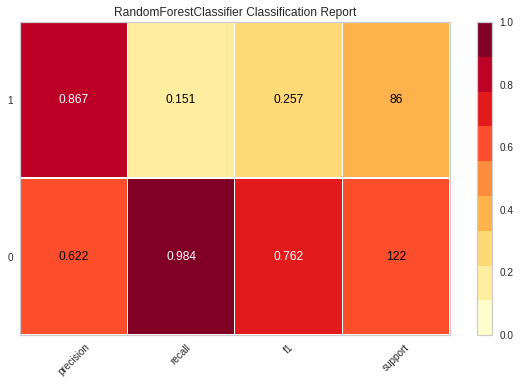

In [61]:
plot_model(m2,'class_report')

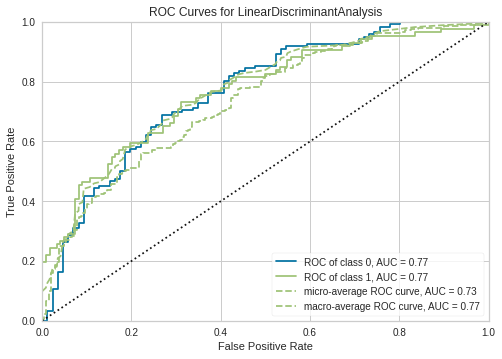

In [57]:
plot_model(m2,'auc')

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf=RandomForestClassifier()

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
rf.score(x_train,y_train)

1.0

In [71]:
rf.score(x_test,y_test)

0.8840579710144928

In [72]:
from sklearn.linear_model import RidgeClassifier

In [73]:
rf1=RidgeClassifier()

In [74]:
rf1.fit(x_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [75]:
rf1.score(x_test,y_test)

0.8454106280193237